# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# model init
kmeans = KMeans(n_clusters=8)

# train model
y_predict = kmeans.fit(X)

# silhouette score
silh_sc = silhouette_score(X, y_predict.labels_)
silh_sc

0.5406824747857601

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [8]:
# model init
kmeans = KMeans(n_clusters=5)

# train model
y_predict = kmeans.fit(X)

# silhouette score
silh_sc = silhouette_score(X, y_predict.labels_)
silh_sc

0.5489993239795675

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [9]:
# model init
kmeans = KMeans(n_clusters=3)

# train model
y_predict = kmeans.fit(X)

# silhouette score
silh_sc = silhouette_score(X, y_predict.labels_)
silh_sc

0.5711381937868838

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

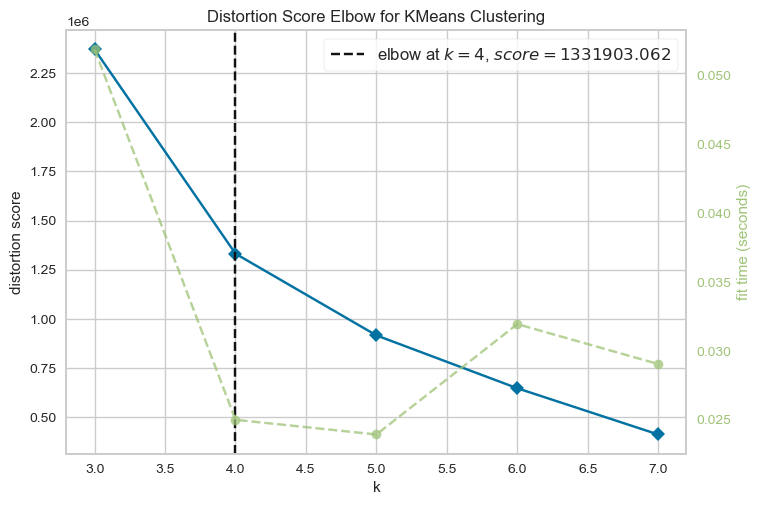

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
#%pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# model init
model = KMeans()

# distortion
visual = KElbowVisualizer(model, k=(3,8))
visual.fit(X)
visual.poof()

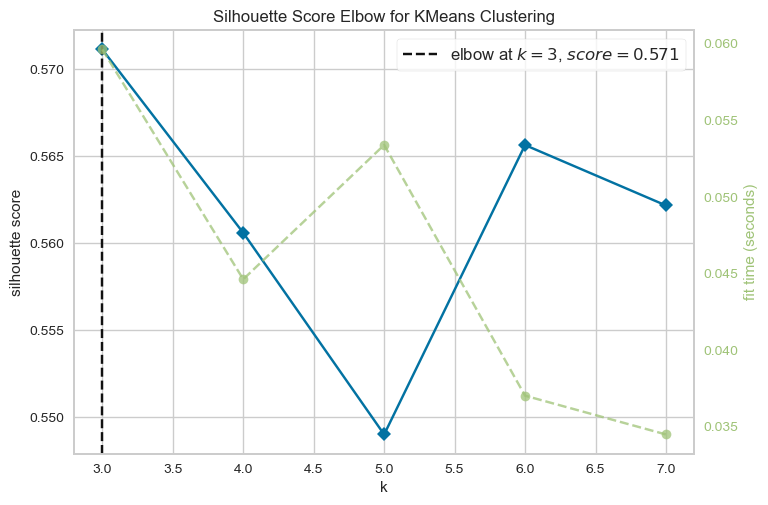

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [13]:
# model init
model = KMeans()

# silhouette
visual = KElbowVisualizer(model, metric='silhouette', k=(3,8))
visual.fit(X)
visual.poof()

/Users/davidapariciofernandez/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/davidapariciofernandez/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


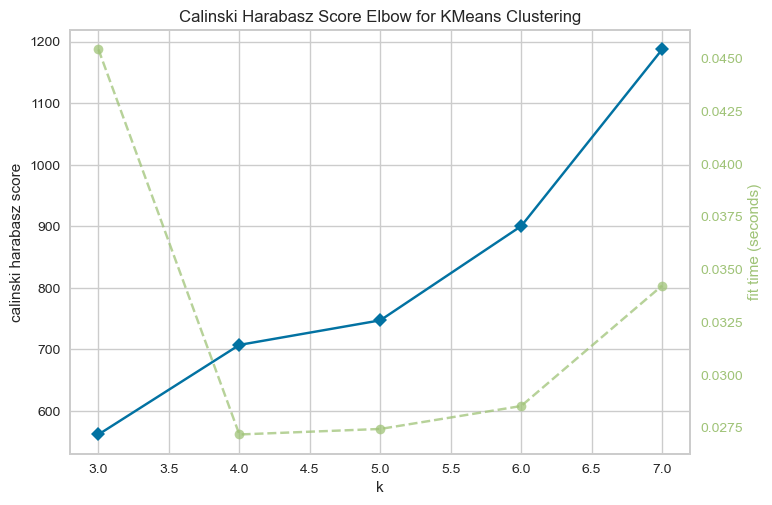

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [15]:
# model init
model = KMeans()

# calinski_harabasz
visual = KElbowVisualizer(model, metric='calinski_harabasz', k=(3,8))
visual.fit(X)
visual.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

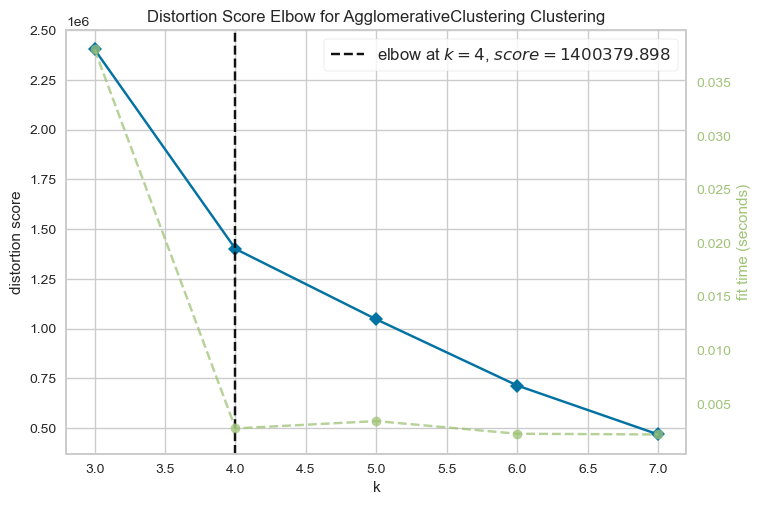

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from sklearn.cluster import AgglomerativeClustering

# model init
model = AgglomerativeClustering()

# distortion
visual = KElbowVisualizer(model, k=(3,8))
visual.fit(X)
visual.poof()

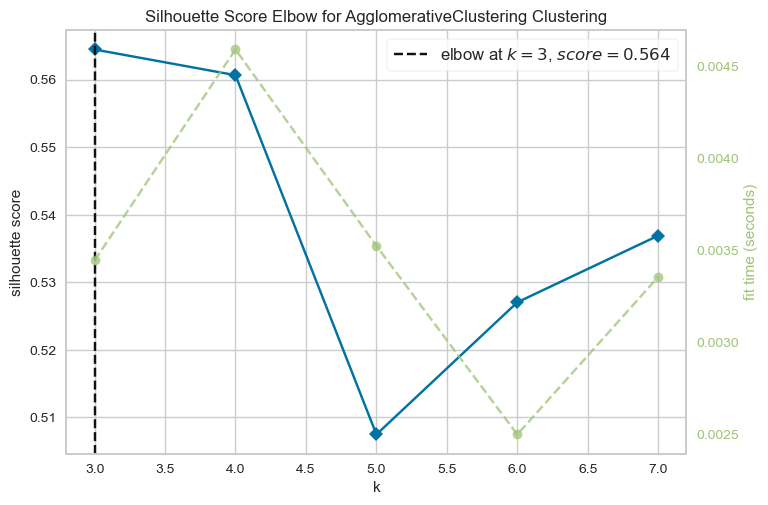

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
# model init
model = AgglomerativeClustering()

# silhouette
visual = KElbowVisualizer(model, metric='silhouette', k=(3,8))
visual.fit(X)
visual.poof()

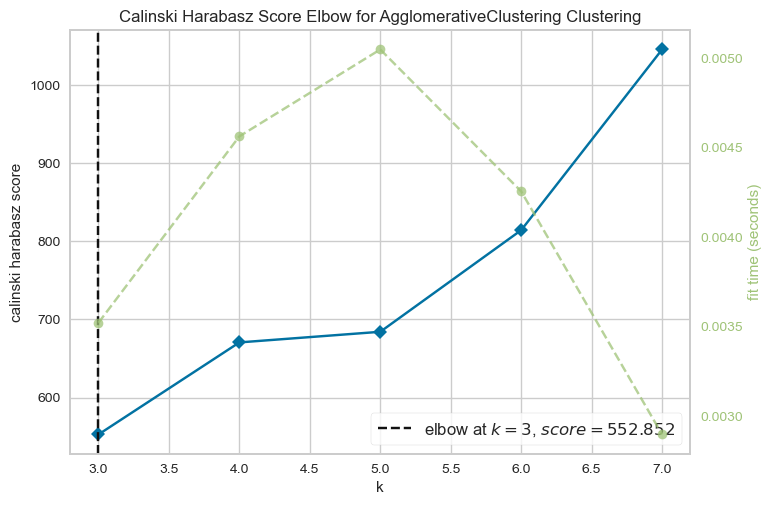

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [18]:
# model init
model = AgglomerativeClustering()

# calinski_harabasz
visual = KElbowVisualizer(model, metric='calinski_harabasz', k=(3,8))
visual.fit(X)
visual.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.